<a href="https://colab.research.google.com/github/Daya-1-sgr/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

Importing the MNIST Dataset

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

The shape of the train dataset is 60000 with each digit in a 28*28 pixels image

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

We have left 10000 samples for testing

Example of how a single sample looks like

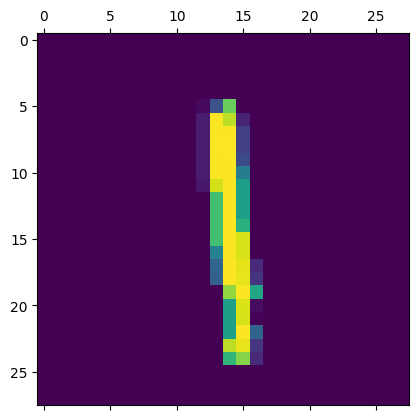

In [8]:
plt.matshow(x_train[8])

The model performs better if we scale the inputs first

In [9]:
x_train=x_train/255
x_test=x_test/255

As the input feature is in a 2*2 matrix(28x28) we will first flatten it into an array of 784 features

In [10]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

Example

In [11]:
x_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Using the Keras module to create a simple neural network with no hidden layers using the *SIGMOID* Activation function and optimise using *ADAM* Optimiser wher losses will be calculated on by *SPARSE CATEGORICAL CROSS-ENTROPY* to increase the metric *ACCURACY* with *5 EPOCHS*

In [12]:
model=keras.Sequential([
   keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8142 - loss: 0.7158
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.3072
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9196 - loss: 0.2861
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9230 - loss: 0.2747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9263 - loss: 0.2629


Evaluating the model in Test dataset

In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.3012


[0.26645538210868835, 0.9258000254631042]

Finding the predictions for the test dataset

In [14]:
y_pred=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
y_pred[0]

array([2.5148140e-02, 3.1640604e-07, 3.6456052e-02, 9.6202856e-01,
       2.3672860e-03, 8.9076102e-02, 2.0555271e-06, 9.9978602e-01,
       1.3090201e-01, 6.4120251e-01], dtype=float32)

7th term in the array is highest,So prediction in this case is 7

In [16]:
y_test[0]

7

In [17]:
np.argmax(y_pred[0])

7

In [18]:
y_pred_labels=[np.argmax(i) for i in y_pred]

Creating a confusion matrix

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    6,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,   12,  913,   18,    7,    3,   10,   10,   48,    3],
       [   4,    0,   16,  928,    0,   17,    2,   10,   25,    8],
       [   1,    1,    3,    2,  920,    0,   11,    4,   11,   29],
       [   9,    3,    2,   43,   10,  755,   16,    6,   41,    7],
       [  13,    3,    7,    1,    7,   10,  910,    2,    5,    0],
       [   2,    5,   20,    7,    7,    1,    0,  952,    6,   28],
       [   5,    7,    5,   16,    9,   15,    8,   10,  892,    7],
       [  11,    7,    1,   10,   28,    5,    0,   22,   10,  915]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

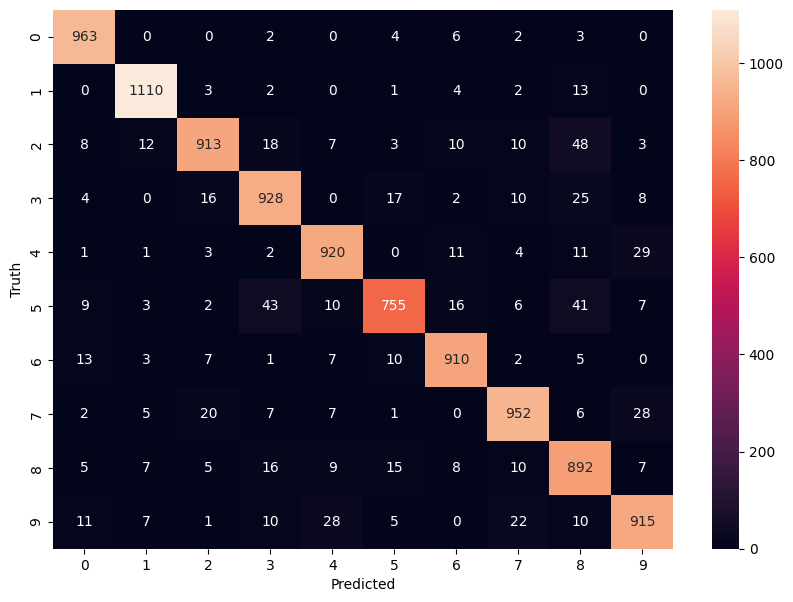

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Creating another model with *1 HIDDEN LAYER* with activation function *RELU* in hidden layer and *SIGMOID* in Final Layer

In [21]:
model1=keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,), activation="relu"),
   keras.layers.Dense(10, activation="sigmoid")
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8730 - loss: 0.4565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9597 - loss: 0.1344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9735 - loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9807 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9840 - loss: 0.0508


In [22]:
model1.evaluate(x_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1023


[0.09169268608093262, 0.972599983215332]

Predicting the test dataset

In [23]:
y_pred1=model1.predict(x_test_flattened)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
y_pred1_labels=[np.argmax(i) for i in y_pred1]

In [25]:
y_pred1_labels[0]

7

Creating and visualising the Confusion matrix

In [26]:
cm1=tf.math.confusion_matrix(y_test,y_pred1_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    2,    2,    1,    1,    2,    2],
       [   0, 1121,    4,    0,    2,    0,    2,    2,    4,    0],
       [   9,    1,  985,    6,    8,    0,    1,   11,   11,    0],
       [   0,    0,    0,  997,    0,    3,    0,    4,    4,    2],
       [   0,    0,    2,    1,  975,    0,    0,    2,    1,    1],
       [   2,    1,    0,   11,    1,  862,    9,    0,    5,    1],
       [   3,    3,    0,    1,   10,    2,  937,    0,    2,    0],
       [   1,    4,    7,    3,    3,    0,    0, 1005,    3,    2],
       [   6,    1,    1,    8,    6,    9,    3,    4,  933,    3],
       [   4,    5,    0,    8,   29,    2,    1,   13,    5,  942]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

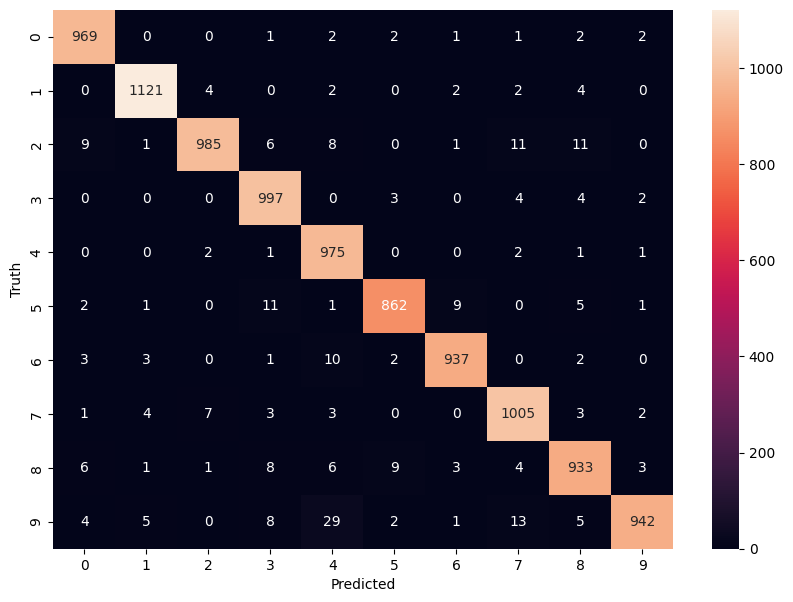

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
with open("mnist_model.pkl", "wb") as f:
    pickle.dump(model, f)